### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    - Which variables are significant in predicting the price of a car
    - How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [53]:
df=pd.read_csv('D:/ML Projects/Car Price Prediction/CarPrice_Assignment.csv')

In [54]:
df.shape

(205, 26)

In [55]:
df.head().transpose()

,0,1,2,3,4
car_ID,1,2,3,4,5
symboling,3,3,1,2,2
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls
fueltype,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumber,two,two,two,four,four
carbody,convertible,convertible,hatchback,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd
enginelocation,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4


In [56]:
cols = df.columns
cols

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [57]:
df[cols].dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [58]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [59]:
df.duplicated().sum()

0

In [60]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [61]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [62]:
cont_Dataset = df.select_dtypes(include=['float64', 'int64'])
cont_Dataset.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [63]:
# dropping car_ID since it is a duplication of index

cont_Dataset = cont_Dataset.drop(['car_ID'], axis=1)
cont_Dataset.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


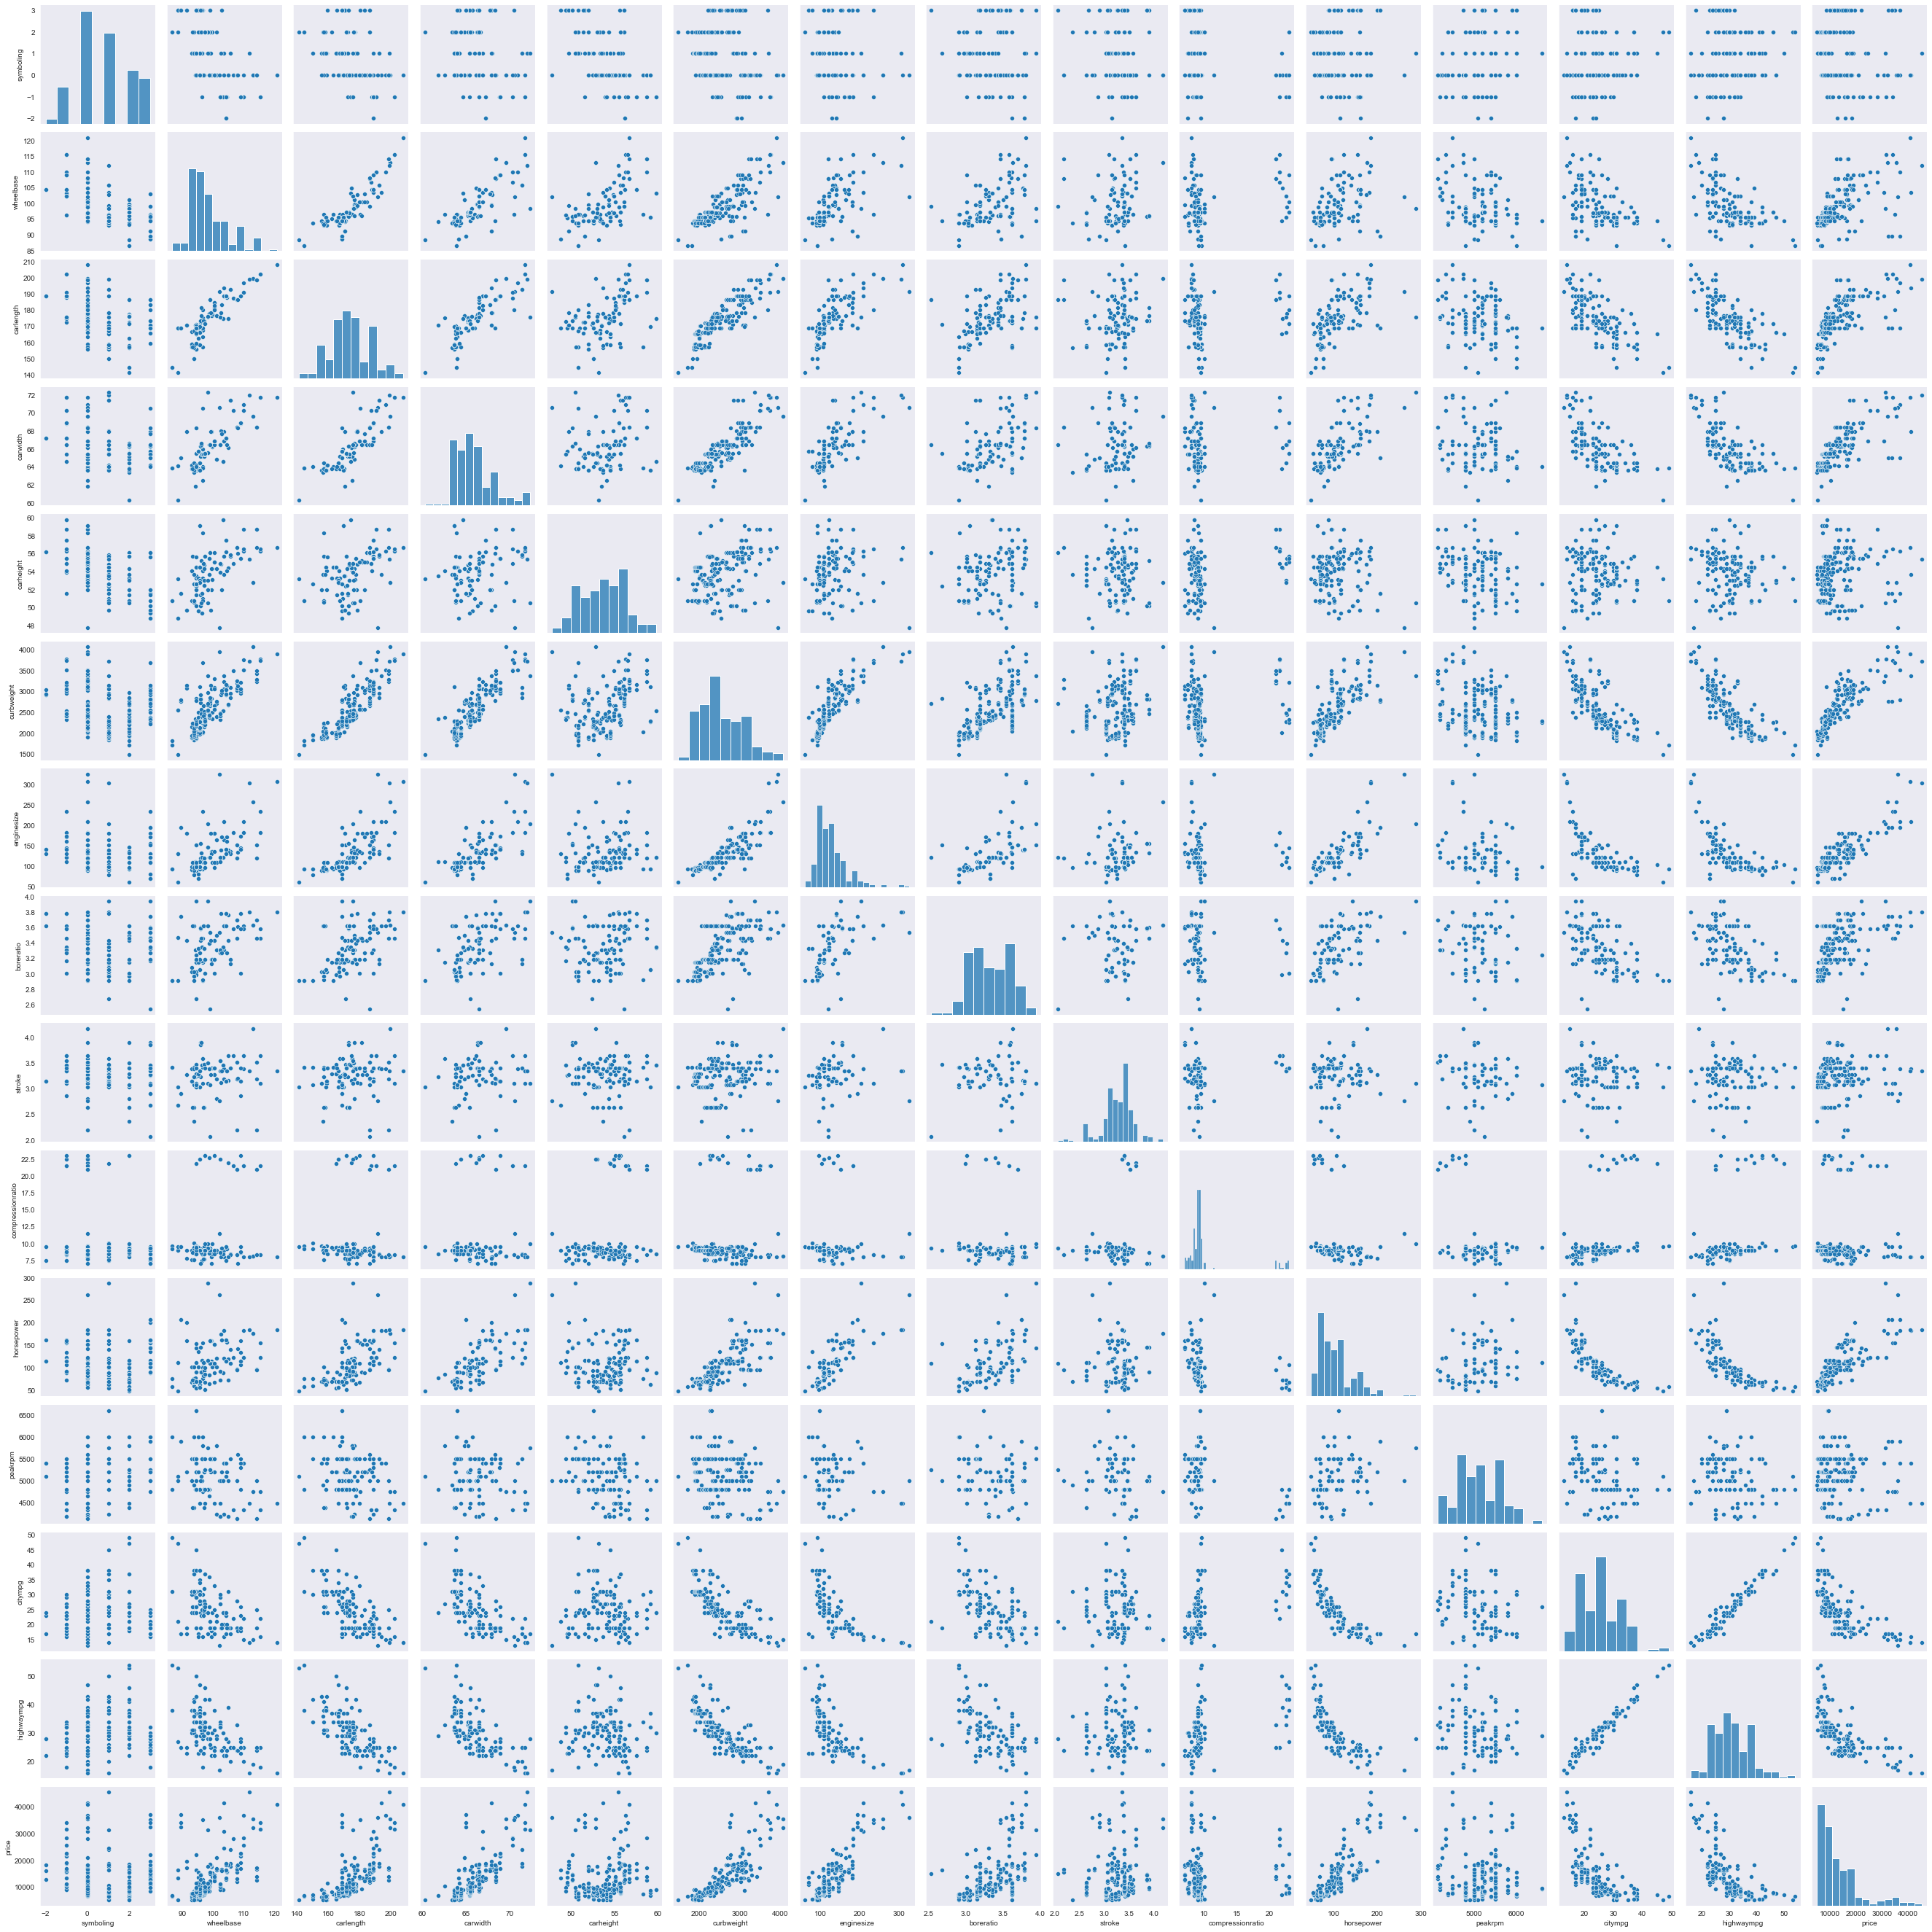

In [64]:
sns.pairplot(cont_Dataset)

In [65]:
cont_Dataset.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


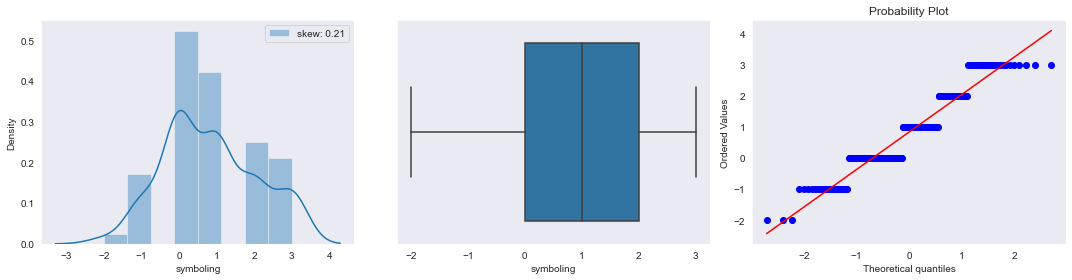

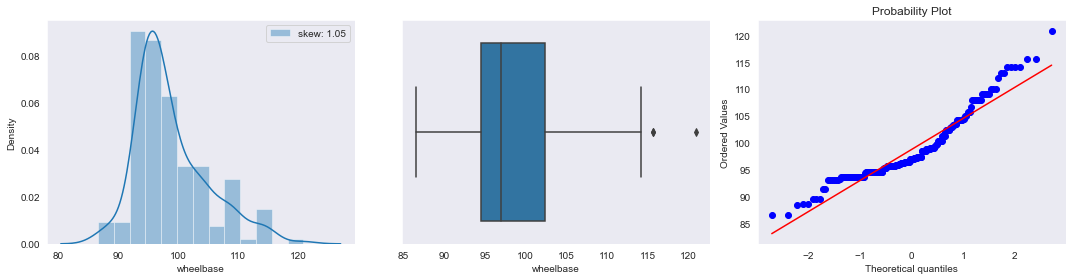

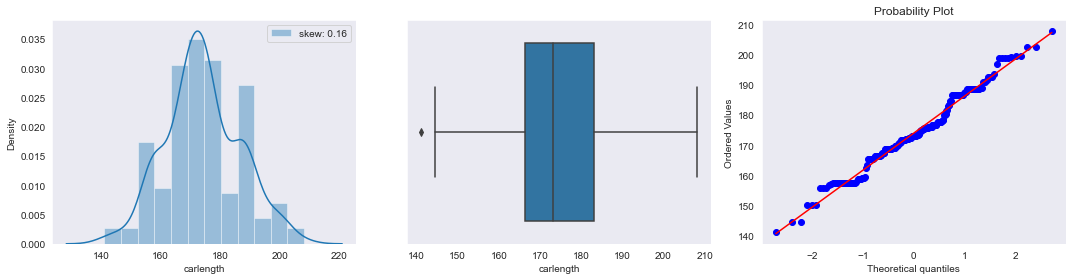

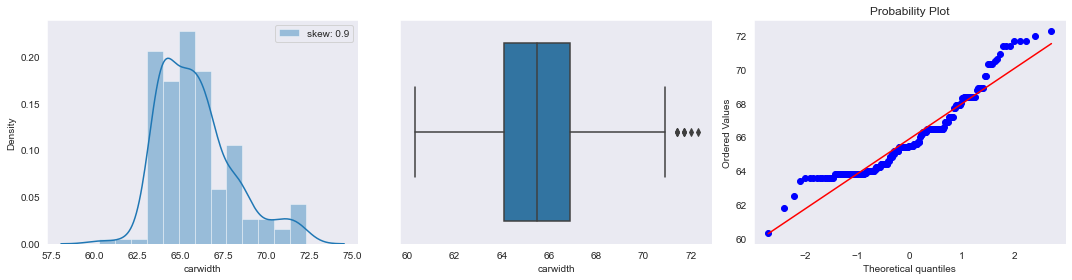

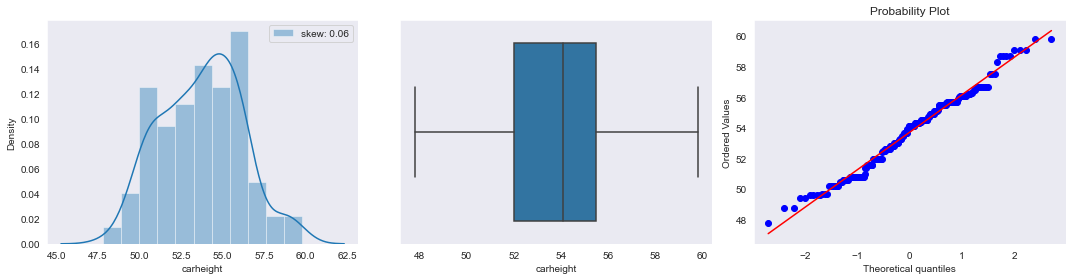

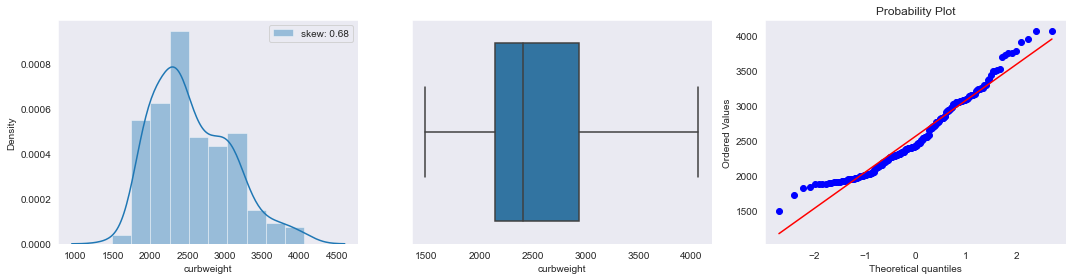

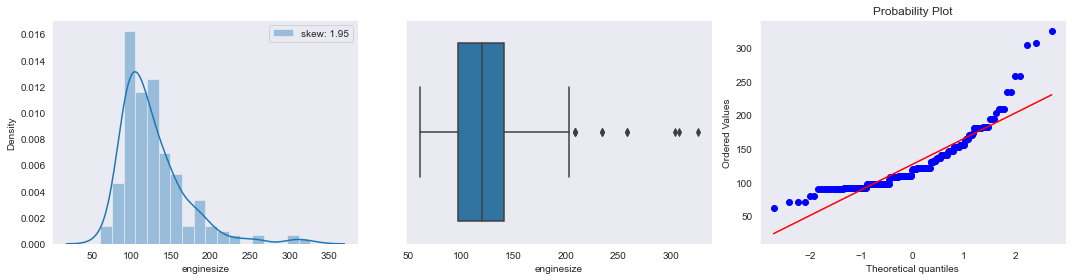

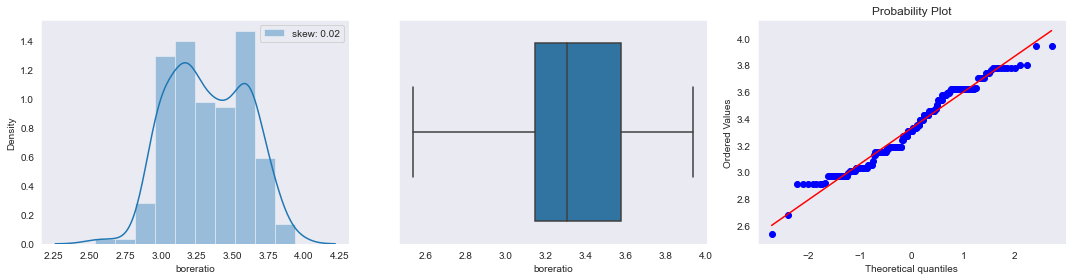

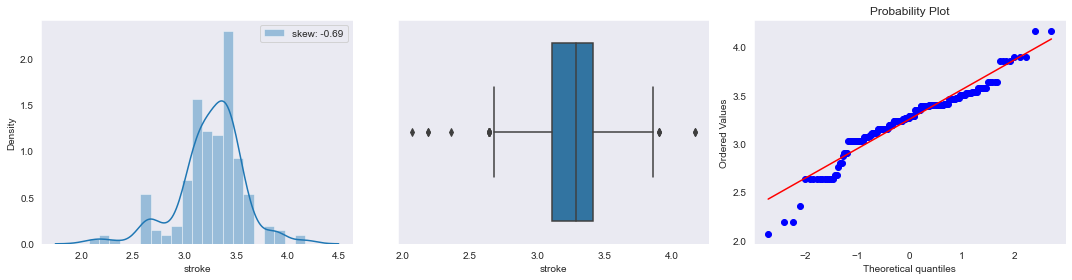

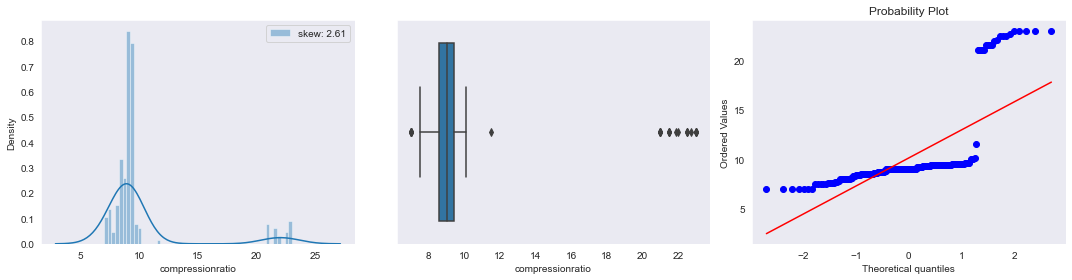

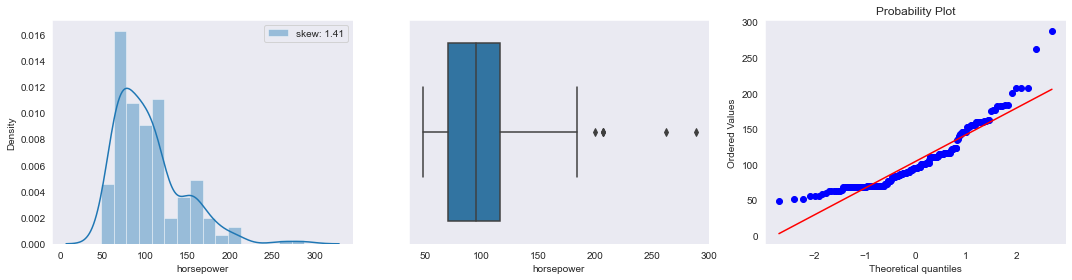

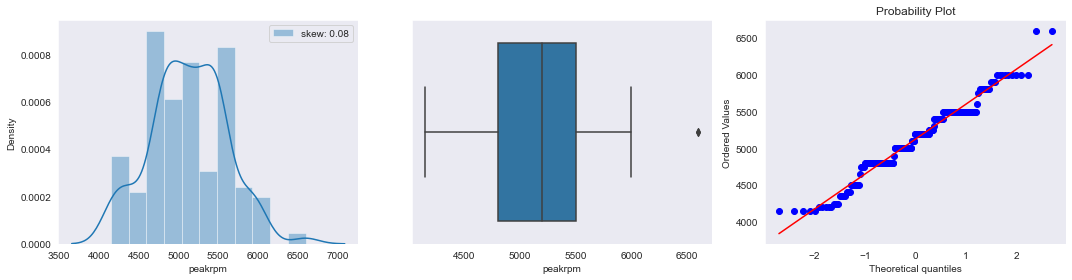

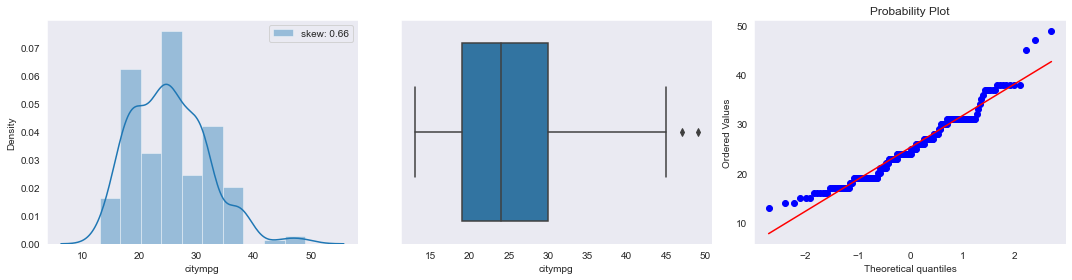

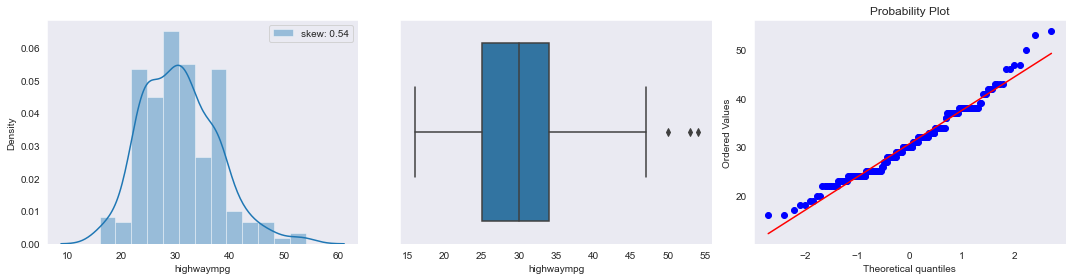

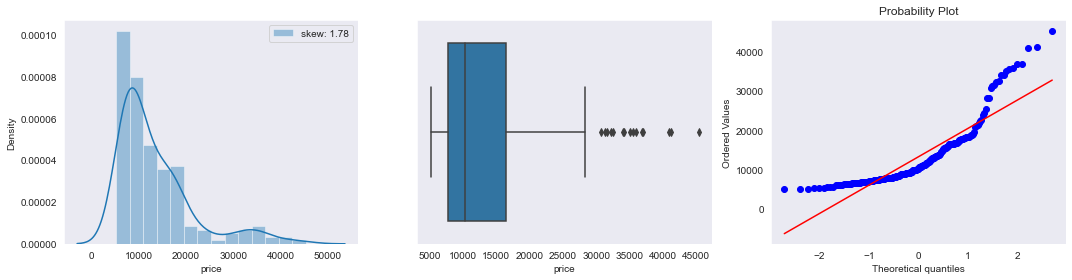

In [66]:
# Ploting graph for each variables to understand more about it

sns.set_style('dark')
for col in cont_Dataset.describe().columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(cont_Dataset[col], label="skew: " + str(np.round(cont_Dataset[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(cont_Dataset[col])
    plt.subplot(133)
    stats.probplot(cont_Dataset[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [67]:
for X in cont_Dataset.describe().columns:
    print('skewness & Max Z-Score for {} is {} and {} '.format(X,cont_Dataset[X].skew(),np.max(abs(stats.zscore(cont_Dataset[X])))))

skewness & Max Z-Score for symboling is 0.21107227205788776 and 2.2814331556403267 
skewness & Max Z-Score for wheelbase is 1.0502137758714858 and 3.6862252135740365 
skewness & Max Z-Score for carlength is 0.1559537713215604 and 2.766741434550069 
skewness & Max Z-Score for carwidth is 0.904003498786254 and 2.98705556854827 
skewness & Max Z-Score for carheight is 0.06312273247192804 and 2.492301615471819 
skewness & Max Z-Score for curbweight is 0.681398189052588 and 2.9079877723438705 
skewness & Max Z-Score for enginesize is 1.9476550452788108 and 4.7926789111561625 
skewness & Max Z-Score for boreratio is 0.02015641810424137 and 2.9230489468762504 
skewness & Max Z-Score for stroke is -0.6897045784233837 and 3.7893106699169268 
skewness & Max Z-Score for compressionratio is 2.6108624576151533 and 3.2449162737413837 
skewness & Max Z-Score for horsepower is 1.4053101543373119 and 4.661447798235916 
skewness & Max Z-Score for peakrpm is 0.07515872237118956 and 3.099649954424412 
ske

<AxesSubplot:>

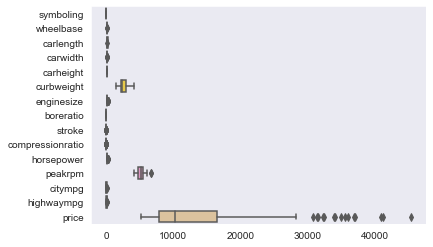

In [68]:
sns.boxplot(data=cont_Dataset, orient="h", palette="Set2")

From the above findings we can conclude that the outliers are present

In [69]:
col_sel=['wheelbase','carwidth','enginesize','compressionratio','horsepower','citympg','highwaympg','price']
def iqr_capping(df1, cols, factor):
    
    for x in cols:  
        q1 = df1[x].quantile(0.25)
        q3 = df1[x].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df1[x] = np.where(df1[x]>upper_whisker, upper_whisker,
            np.where(df1[x]<lower_whisker, lower_whisker, df1[x]))


iqr_capping(cont_Dataset, col_sel, 1.5)

<AxesSubplot:>

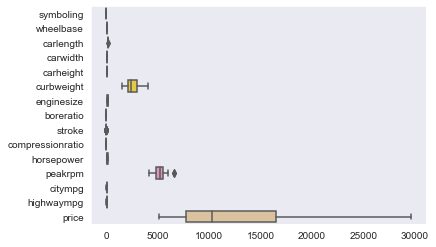

In [70]:
sns.boxplot(data=cont_Dataset, orient="h", palette="Set2")

In [71]:
# # split into X and y
# X = cont_Dataset.drop(['price'], axis=1)
# y  = cont_Dataset['price']


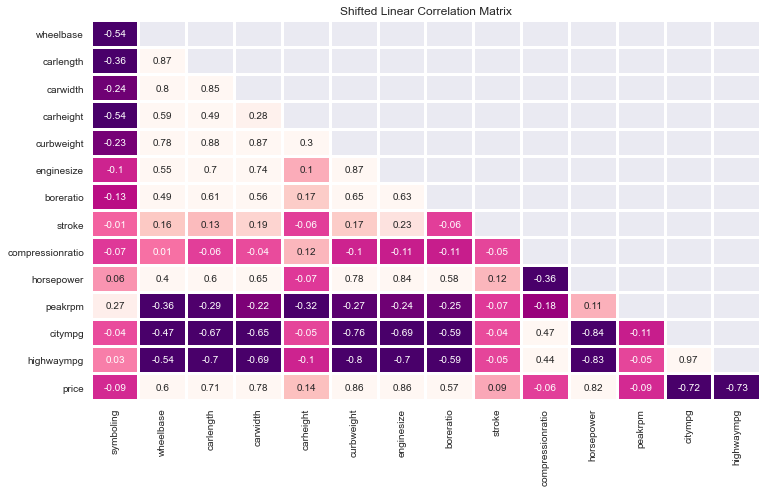

In [72]:
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(12,7))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
    ax.set_title('Shifted Linear Correlation Matrix')
    
corrMat(cont_Dataset)

In [73]:
cat_Dataset = df.select_dtypes(include=['object'])
cat_Dataset['CarName'] = cat_Dataset['CarName'].apply(lambda x : x.split(' ')[0])
cat_Dataset.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [74]:
cat_Dataset.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [75]:
cat_Dataset.CarName.replace('maxda','mazda',inplace=True)
cat_Dataset.CarName.replace('porcshce','porsche',inplace=True)
cat_Dataset.CarName.replace('toyouta','toyota',inplace=True)
cat_Dataset.CarName.replace('vokswagen','volkswagen',inplace=True)
cat_Dataset.CarName.replace('vw','volkswagen',inplace=True)
cat_Dataset.CarName.replace('Nissan','nissan',inplace=True)
cat_Dataset.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [76]:
Dummy_Dataset=pd.get_dummies(cat_Dataset,drop_first=True)
Dummy_Dataset.head()

,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


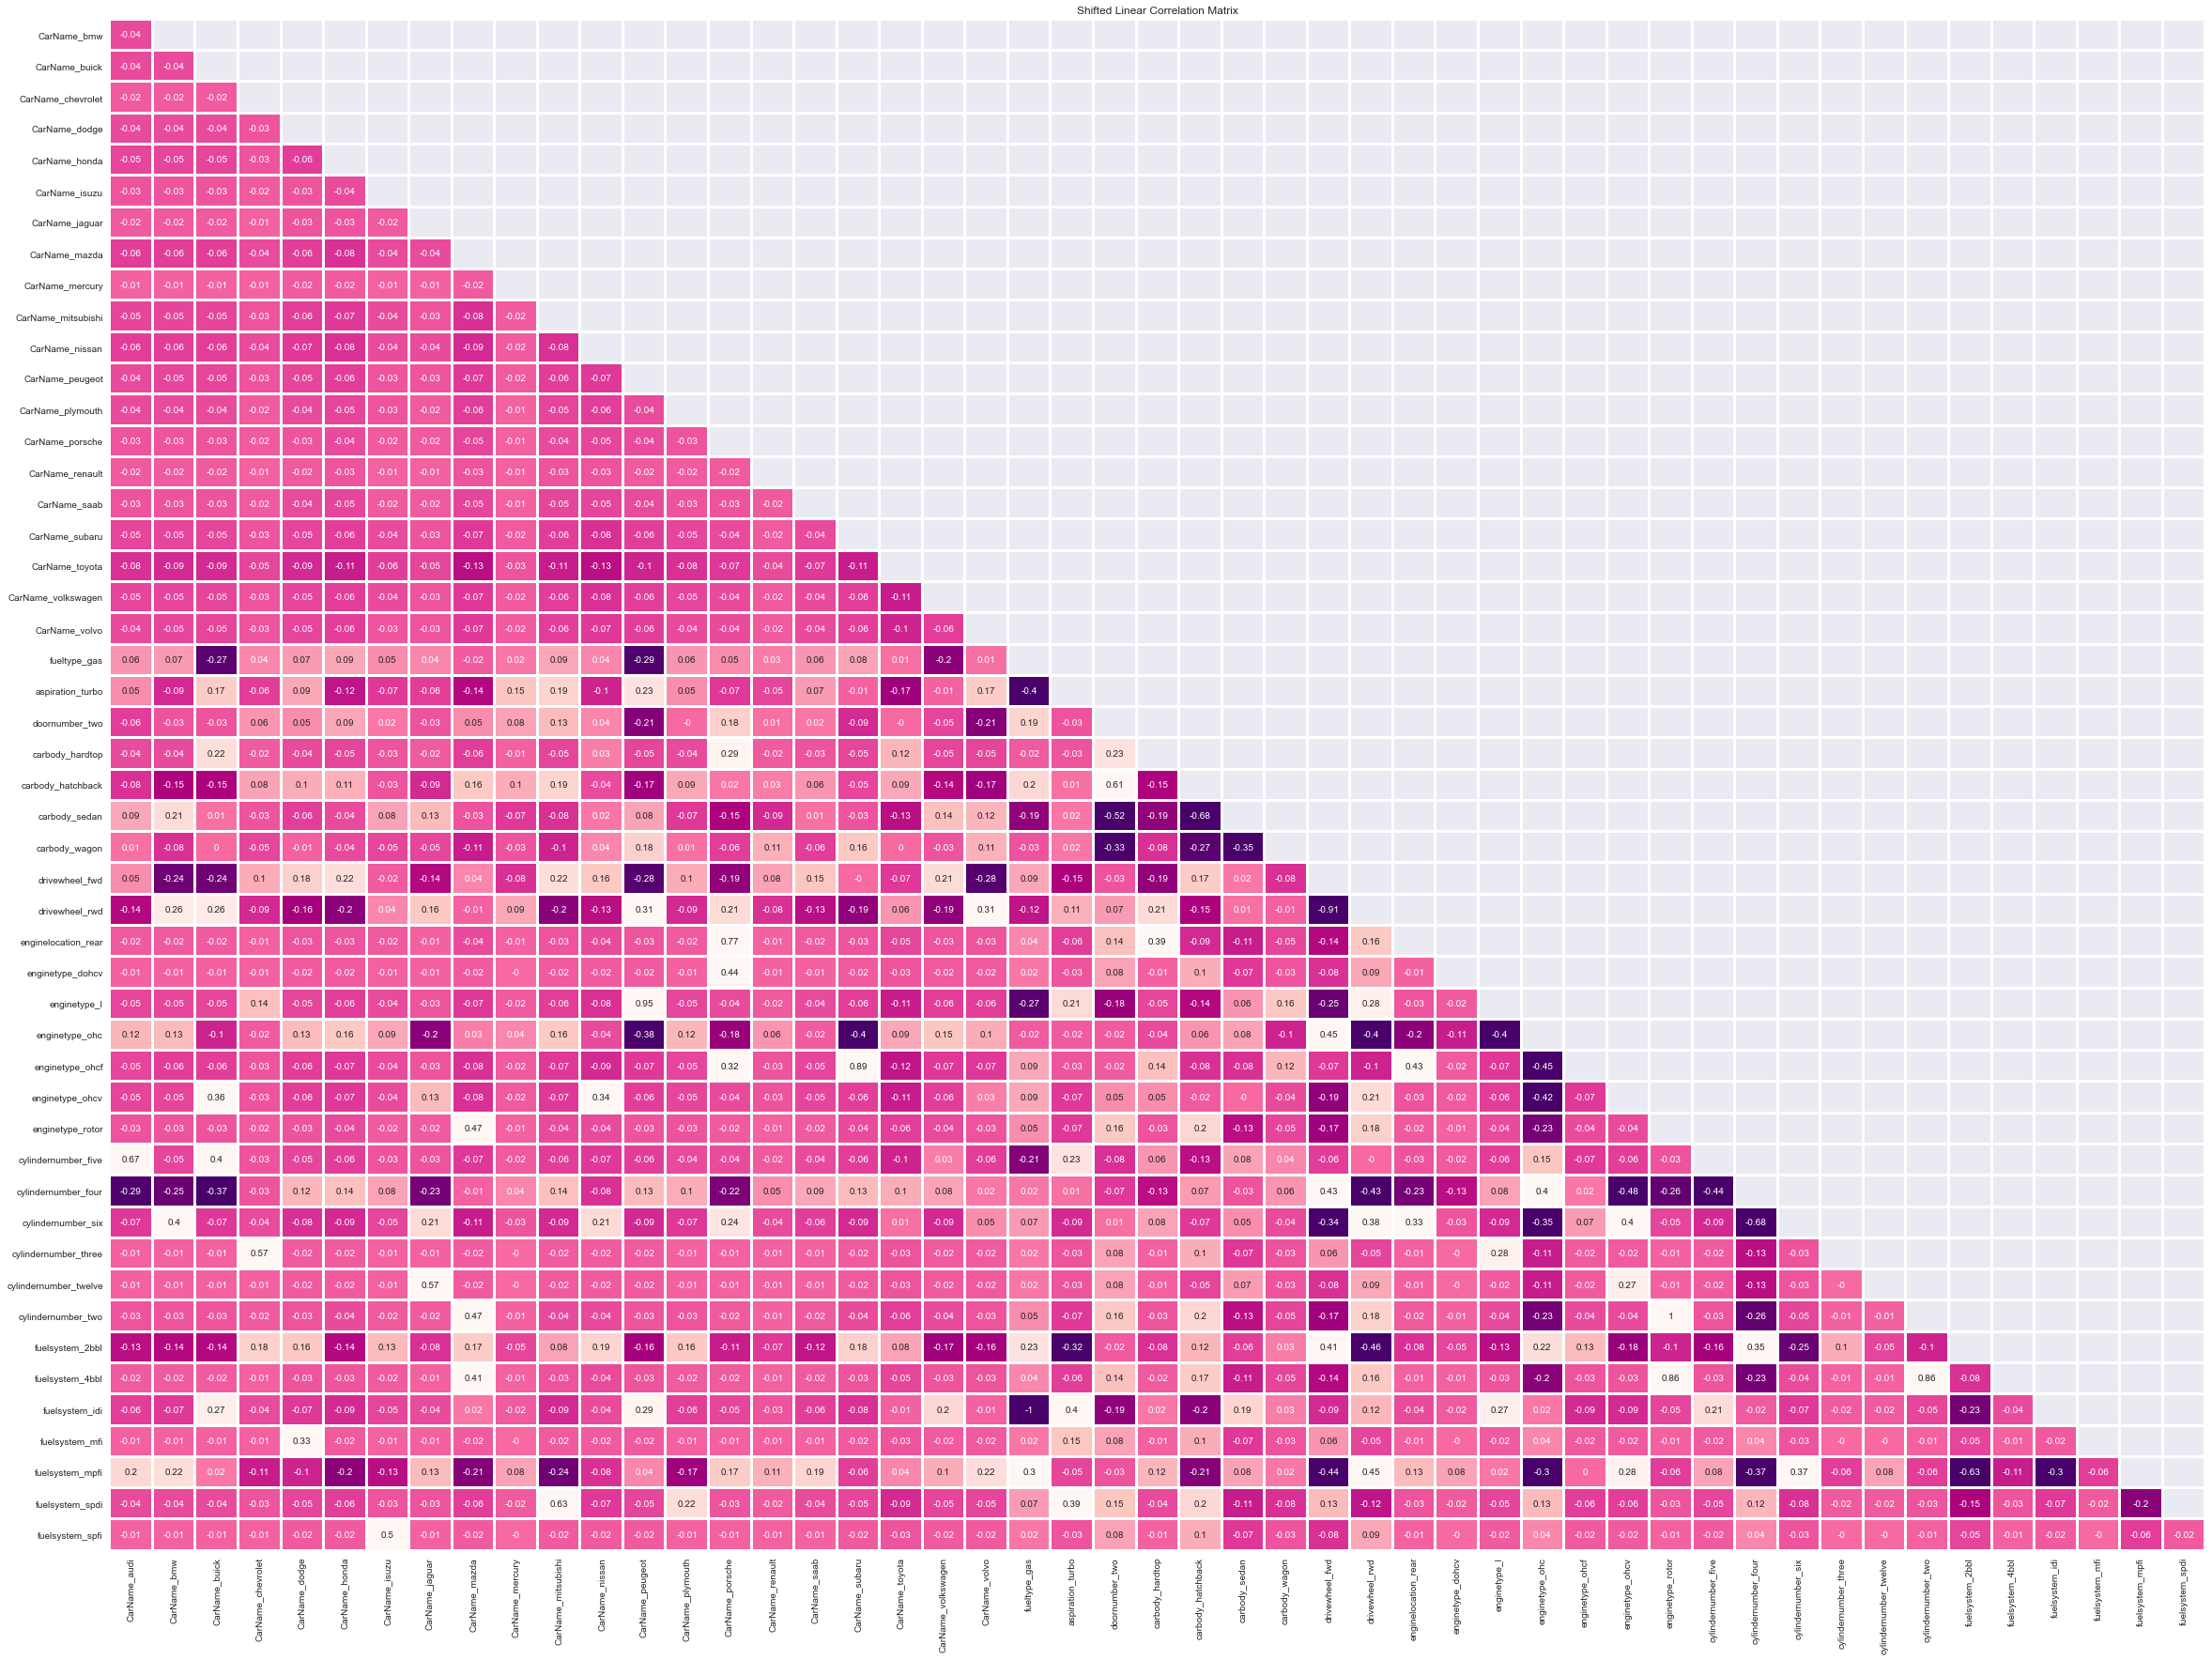

In [77]:
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(40,30))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
    ax.set_title('Shifted Linear Correlation Matrix')
    
corrMat(Dummy_Dataset)

In [78]:
# concat dummy variables with X
final_Data = pd.concat([cont_Dataset, Dummy_Dataset], axis=1)

In [79]:
final_Data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130.0,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130.0,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152.0,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109.0,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136.0,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [80]:
final_Data.shape

(205, 65)

In [81]:
final_Data.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
symboling,1.000000,-0.537515,-0.357612,-0.235697,-0.541038,-0.227691,-0.100869,-0.130051,-0.008735,-0.070206,...,0.065707,-0.047012,0.245950,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
wheelbase,-0.537515,1.000000,0.874780,0.798179,0.594171,0.775265,0.554028,0.489113,0.162274,0.011208,...,-0.123021,0.039241,-0.081998,-0.400532,-0.070837,0.314415,-0.033538,0.350953,-0.118470,-0.032345
carlength,-0.357612,0.874780,1.000000,0.847860,0.491029,0.877728,0.701468,0.606454,0.129533,-0.063677,...,-0.187445,0.100413,-0.057877,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
carwidth,-0.235697,0.798179,0.847860,1.000000,0.283227,0.871963,0.740015,0.562591,0.186631,-0.040546,...,-0.188152,0.158881,-0.012518,-0.530407,-0.010814,0.239809,0.014003,0.466246,-0.045367,-0.023059
carheight,-0.541038,0.594171,0.491029,0.283227,1.000000,0.295572,0.101874,0.171071,-0.055307,0.124448,...,-0.015076,-0.170181,-0.238720,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-0.066778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fuelsystem_idi,-0.194311,0.314415,0.212679,0.239809,0.284631,0.217275,0.107971,0.054451,0.241829,0.648473,...,-0.023020,-0.023020,-0.046383,-0.226565,-0.040070,1.000000,-0.023020,-0.302574,-0.070457,-0.023020
fuelsystem_mfi,0.122067,-0.033538,-0.004831,0.014003,-0.101245,0.034431,0.064928,0.070030,0.144263,-0.145007,...,-0.004902,-0.004902,-0.009877,-0.048245,-0.008532,-0.023020,1.000000,-0.064430,-0.015003,-0.004902
fuelsystem_mpfi,0.012532,0.350953,0.511374,0.466246,0.108685,0.520220,0.517736,0.419335,-0.110280,-0.275448,...,-0.064430,0.076082,-0.059039,-0.634114,-0.112147,-0.302574,-0.064430,1.000000,-0.197195,-0.064430
fuelsystem_spdi,0.181939,-0.118470,-0.079790,-0.045367,-0.278615,-0.002434,0.020277,-0.004213,0.251259,-0.422752,...,-0.015003,-0.015003,-0.030229,-0.147658,-0.026114,-0.070457,-0.015003,-0.197195,1.000000,-0.015003


In [82]:
final_Data.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'CarName_audi', 'CarName_bmw', 'CarName_buick', 'CarName_chevrolet',
       'CarName_dodge', 'CarName_honda', 'CarName_isuzu', 'CarName_jaguar',
       'CarName_mazda', 'CarName_mercury', 'CarName_mitsubishi',
       'CarName_nissan', 'CarName_peugeot', 'CarName_plymouth',
       'CarName_porsche', 'CarName_renault', 'CarName_saab', 'CarName_subaru',
       'CarName_toyota', 'CarName_volkswagen', 'CarName_volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cyl

In [83]:
# Checking multicollinearity using VIF

df_final = final_Data
import statsmodels.api as sm
features=list(df_final.columns)

Rsqr_Vif = []
for i in range(1, len(df_final.columns)):
    
    x=df_final.loc[:,df_final.columns!=features[i]]
    y=df_final.loc[:,df_final.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    
    Rsqr_Vif.append({'column':features[i],'Rsqr':rsq,'vif':vif})

rsq=pd.DataFrame(Rsqr_Vif)
rsq.transpose()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
column,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
Rsqr,0.958365,0.962876,0.936219,0.878786,0.984482,0.984457,0.937137,0.853045,0.904209,0.978291,...,1.0,0.837949,1.0,0.97054,0.840764,0.999365,0.56624,0.976234,0.894605,0.592595
vif,24.02,26.94,15.68,8.25,64.44,64.34,15.91,6.8,10.44,46.06,...,inf,6.17,inf,33.94,6.28,1574.99,2.31,42.08,9.49,2.45


In [84]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif_data=X
# ## calculating VIF for every column
# VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
# VIF

In [85]:
tot_Y = final_Data['price']
tot_X = final_Data.drop('price', axis = 1)

In [86]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(tot_X,tot_Y,test_size=0.3, random_state=42)

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lm = LinearRegression()
lm.fit(x_train,y_train)
Y_pred = lm.predict(x_test)
print(f'RMSE = {np.sqrt(metrics.mean_squared_error(y_test,Y_pred))}, r2 score = {metrics.r2_score(y_test,Y_pred)}')

RMSE = 1873.1552970849689, r2 score = 0.9249953625478131


Without scaling and multicollinearity treatment the model is looking quite good.
Will check the same after scaling & PCA.

In [88]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
scalar.fit(tot_X)
scaled_df=scalar.transform(tot_X)

In [89]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(scaled_df)

PCA()

In [90]:
#np.cumsum(pca.explained_variance_ratio_)[60]
exp_var_pca = pca.explained_variance_ratio_
exp_var_pca


array([1.67099387e-01, 8.71356511e-02, 5.53535134e-02, 5.46022543e-02,
       4.51766143e-02, 4.22005315e-02, 3.49998563e-02, 3.29131900e-02,
       3.07302047e-02, 2.81354357e-02, 2.59731246e-02, 2.55658853e-02,
       2.37204244e-02, 2.30267696e-02, 2.22268998e-02, 2.16630719e-02,
       2.02545177e-02, 1.94328151e-02, 1.90218982e-02, 1.76966675e-02,
       1.68723856e-02, 1.65320925e-02, 1.61254671e-02, 1.48900148e-02,
       1.41155314e-02, 1.32463007e-02, 1.26916241e-02, 1.02142759e-02,
       9.38467976e-03, 8.28530429e-03, 7.70675298e-03, 7.40468687e-03,
       7.00456126e-03, 5.88900572e-03, 4.90483726e-03, 4.52718996e-03,
       4.20539837e-03, 3.73148734e-03, 3.21568132e-03, 3.06051037e-03,
       2.82516775e-03, 2.22272221e-03, 2.17737944e-03, 1.84579610e-03,
       1.74888586e-03, 1.48635735e-03, 1.18305770e-03, 1.10647688e-03,
       8.27649654e-04, 7.31631645e-04, 6.26382508e-04, 5.83254708e-04,
       3.75003041e-04, 3.43114509e-04, 2.72083179e-04, 2.03938788e-04,
      

In [91]:
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
cum_sum_eigenvalues

array([0.16709939, 0.25423504, 0.30958855, 0.36419081, 0.40936742,
       0.45156795, 0.48656781, 0.519481  , 0.5502112 , 0.57834664,
       0.60431976, 0.62988565, 0.65360607, 0.67663284, 0.69885974,
       0.72052281, 0.74077733, 0.76021015, 0.77923204, 0.79692871,
       0.8138011 , 0.83033319, 0.84645866, 0.86134867, 0.8754642 ,
       0.8887105 , 0.90140213, 0.9116164 , 0.92100108, 0.92928639,
       0.93699314, 0.94439783, 0.95140239, 0.95729139, 0.96219623,
       0.96672342, 0.97092882, 0.97466031, 0.97787599, 0.9809365 ,
       0.98376167, 0.98598439, 0.98816177, 0.99000756, 0.99175645,
       0.99324281, 0.99442587, 0.99553234, 0.99635999, 0.99709162,
       0.99771801, 0.99830126, 0.99867626, 0.99901938, 0.99929146,
       0.9994954 , 0.99968097, 0.99981879, 0.99992954, 1.        ,
       1.        , 1.        , 1.        , 1.        ])

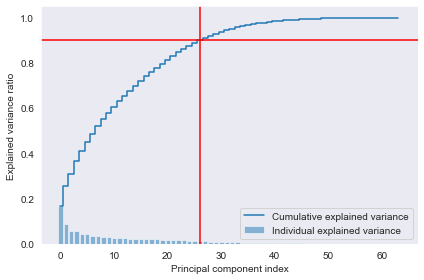

In [92]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.axhline(y=.9,color='r')
plt.axvline(x=26,color='r')
plt.tight_layout()
plt.show()

In [93]:
# def MC_remover(data):
#     vif=pd.Series([variance_inflation_factor(data.values,i)for i in range(data.shape[1])],index=data.columns)
#     if vif.max()>5:
#         print(vif[vif == vif.max()].index[0],'has been removed')
#         data = data.drop(columns=[vif[vif==vif.max()].index[0]])
#         return data
#     else:
#         print("No multicollinearity present anymore")
#         return data

In [94]:
#26 components provides 90% variance
pca=PCA(n_components=26)
# finding the PCA
PCA_result=pca.fit(scaled_df)
x_pca=pca.fit_transform(scaled_df)
X_train=pd.DataFrame(x_pca) 


In [95]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_train,tot_Y,test_size=0.3, random_state=42)

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lm = LinearRegression()
lm.fit(x_train,y_train)
Y_pred = lm.predict(x_test)
print(f'model:{lm} & RMSE = {np.sqrt(metrics.mean_squared_error(y_test,Y_pred))}, r2 score = {metrics.r2_score(y_test,Y_pred)}')

model:LinearRegression() & RMSE = 2349.48352544366, r2 score = 0.8819990904656457


After scaling & PCA r2 score is slightly decreased

XGBoost Regression Model

In [97]:
import xgboost as xg
# create an xgboost regression model
model = xg.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [98]:
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(model.score(x_test, y_test))

0.9271187099121818


Ridge Regression Model

In [99]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error

R=Ridge(alpha=0.1)
R.fit(x_train, y_train)
y_pred1=R.predict(x_test)
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.8820666412829331
RMSE 2348.8109363373674


Lasso Regression Model

In [100]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(x_train, y_train)
pred_test_lasso= model_lasso.predict(x_test)
print("RMSE",np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print("R2 score",r2_score(y_test, pred_test_lasso))

RMSE 2349.172660806802
R2 score 0.8820303142497166


ElasticNet Regression Model

In [101]:
model_enet = ElasticNet(alpha = 0.1)
model_enet.fit(x_train, y_train)
pred_test_enet= model_enet.predict(x_test)
print("RMSE",np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print("R2 score",r2_score(y_test, pred_test_enet))

RMSE 2312.817895780666
R2 score 0.8856533554942992
